In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
%matplotlib inline 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
df = pd.read_csv('DATA_Customer-Churn.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [6]:
df_f = df.fillna(0)
df_f

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,Yes


In [9]:
df_f['Churn'] = df_f['Churn'].replace({'Yes': 1, 'No': 0})

In [10]:
features = ['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']
X = df_f[features]
y = df_f['Churn']

In [17]:
log_model = LogisticRegression() 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

s = StandardScaler()
s.fit(X_train)
X_train_log = s.transform(X_train)
X_test_log = s.transform(X_test)



log_model.fit(X_train_log, y_train)

y_pred_train_log = log_model.predict(X_train_log)
y_pred_test_log = log_model.predict(X_test_log)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)



,Error_metric,Train,Test
0,Accuracy,0.788605,0.802697
1,Precision,0.645631,0.695312
2,Recall,0.446009,0.470899


In [35]:
TT_SPLIT = 0.2     # ratio train/test size
RAND_STATE = 123   # specifies a sampling for repeatable results
numerical = df_f.select_dtypes(np.number)
numerical.dropna(inplace=True)

In [47]:
X_2 = numerical.drop(columns=['Churn'])
y_2 = numerical['Churn']



In [103]:
X_2_train, X_2_test, y_2_train, y_2_test=train_test_split(X_2, y_2, test_size=TT_SPLIT,random_state=RAND_STATE)

s.fit(X_2_train)
X_2_train_log = s.transform(X_2_train)
X_2_test_log = s.transform(X_2_test)
model = KNeighborsClassifier(n_neighbors=5) # declare we're using knn classification model
model.fit(X_2_train_log, y_2_train) # train model
y_2_pred = model.predict(X_2_test_log) # predict test
y_2_pred_train=model.predict(X_2_train_log) # predict train (for sanity checks)

performance_2_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_2_train, y_2_pred_train),
                                         precision_score(y_2_train, y_2_pred_train),
                                         recall_score(y_2_train, y_2_pred_train)],
                               'Test': [accuracy_score(y_2_test, y_2_pred),
                                        precision_score(y_2_test, y_2_pred),
                                        recall_score(y_2_test, y_2_pred)]})

display(performance_2_log)

,Error_metric,Train,Test
0,Accuracy,0.834931,0.775018
1,Precision,0.727273,0.616314
2,Recall,0.591186,0.517766


## 1 = Churn 0 = Stays

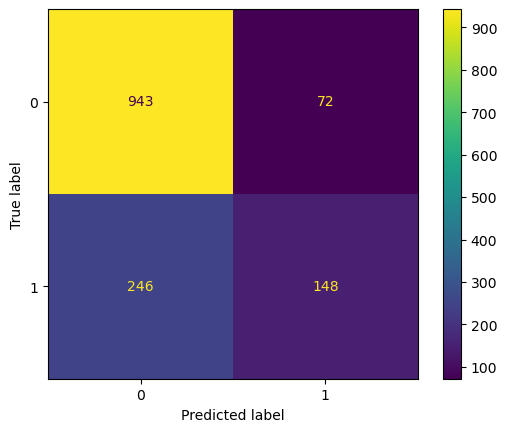

In [49]:
cm = confusion_matrix(y_2_test, y_2_pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [50]:
sample = pd.DataFrame(X_test_log).sample()
log_model.predict(sample)

array([0], dtype=int64)

In [51]:
log_model.predict_proba(sample) #probability #when [0] possiblity left,not possibility right

array([[0.87206053, 0.12793947]])

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [75]:
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X, y, test_size=0.30, random_state=11)

for i in range(1,20) :

    model = DecisionTreeClassifier(max_depth=i)

    model.fit(X_3_train, y_3_train)

    y_pred_train_dt = model.predict(X_3_train)
    y_pred_test_dt = model.predict(X_3_test)

    print (i)
    
    performance_3_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                   'Train': [accuracy_score(y_3_train, y_pred_train_dt),
                                             precision_score(y_3_train, y_pred_train_dt),
                                             recall_score(y_3_train, y_pred_train_dt)],
                                   'Test': [accuracy_score(y_3_test, y_pred_test_dt),
                                            precision_score(y_3_test, y_pred_test_dt),
                                            recall_score(y_3_test, y_pred_test_dt)]})

    display(performance_3_df)

1


C:\Users\Serhat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Serhat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Error_metric,Train,Test
0,Accuracy,0.736917,0.729295
1,Precision,0.000000,0.000000
2,Recall,0.000000,0.000000


2


,Error_metric,Train,Test
0,Accuracy,0.787018,0.778514
1,Precision,0.647904,0.662500
2,Recall,0.417116,0.370629


3


,Error_metric,Train,Test
0,Accuracy,0.787018,0.778514
1,Precision,0.647904,0.662500
2,Recall,0.417116,0.370629


4


,Error_metric,Train,Test
0,Accuracy,0.792089,0.781354
1,Precision,0.660000,0.655367
2,Recall,0.432537,0.405594


5


,Error_metric,Train,Test
0,Accuracy,0.801217,0.779934
1,Precision,0.691194,0.655977
2,Recall,0.441789,0.393357


6


,Error_metric,Train,Test
0,Accuracy,0.805882,0.773308
1,Precision,0.692744,0.628099
2,Recall,0.471087,0.398601


7


,Error_metric,Train,Test
0,Accuracy,0.817444,0.775674
1,Precision,0.756129,0.645833
2,Recall,0.451812,0.379371


8


,Error_metric,Train,Test
0,Accuracy,0.831846,0.772835
1,Precision,0.789604,0.630682
2,Recall,0.491904,0.388112


9


,Error_metric,Train,Test
0,Accuracy,0.846045,0.762423
1,Precision,0.786780,0.581776
2,Recall,0.569005,0.435315


10


,Error_metric,Train,Test
0,Accuracy,0.863895,0.754378
1,Precision,0.840959,0.564477
2,Recall,0.595220,0.405594


11


,Error_metric,Train,Test
0,Accuracy,0.887627,0.743966
1,Precision,0.830810,0.530815
2,Recall,0.719352,0.466783


12


,Error_metric,Train,Test
0,Accuracy,0.906491,0.733081
1,Precision,0.876577,0.508197
2,Recall,0.750193,0.433566


13


,Error_metric,Train,Test
0,Accuracy,0.928398,0.729768
1,Precision,0.902730,0.500971
2,Recall,0.815729,0.451049


14


,Error_metric,Train,Test
0,Accuracy,0.942596,0.718883
1,Precision,0.936317,0.478764
2,Recall,0.838859,0.433566


15


,Error_metric,Train,Test
0,Accuracy,0.954361,0.720303
1,Precision,0.950420,0.481973
2,Recall,0.872012,0.444056


16


,Error_metric,Train,Test
0,Accuracy,0.965517,0.716517
1,Precision,0.976331,0.474286
2,Recall,0.890517,0.435315


17


,Error_metric,Train,Test
0,Accuracy,0.974645,0.716990
1,Precision,0.977199,0.475564
2,Recall,0.925212,0.442308


18


,Error_metric,Train,Test
0,Accuracy,0.980325,0.715570
1,Precision,0.980000,0.473588
2,Recall,0.944487,0.454545


19


,Error_metric,Train,Test
0,Accuracy,0.983773,0.710838
1,Precision,0.991916,0.464088
2,Recall,0.946029,0.440559


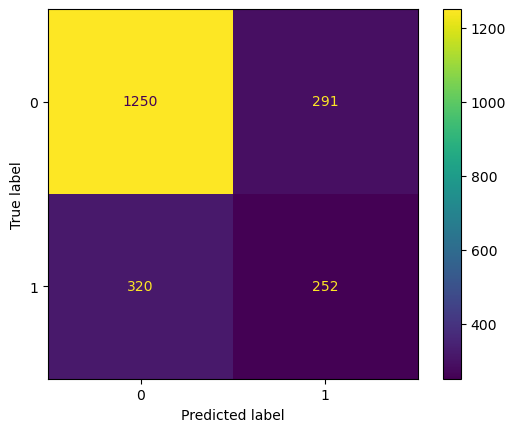

In [76]:
cm = confusion_matrix(y_3_test, y_pred_test_dt, labels=model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

<BarContainer object of 4 artists>

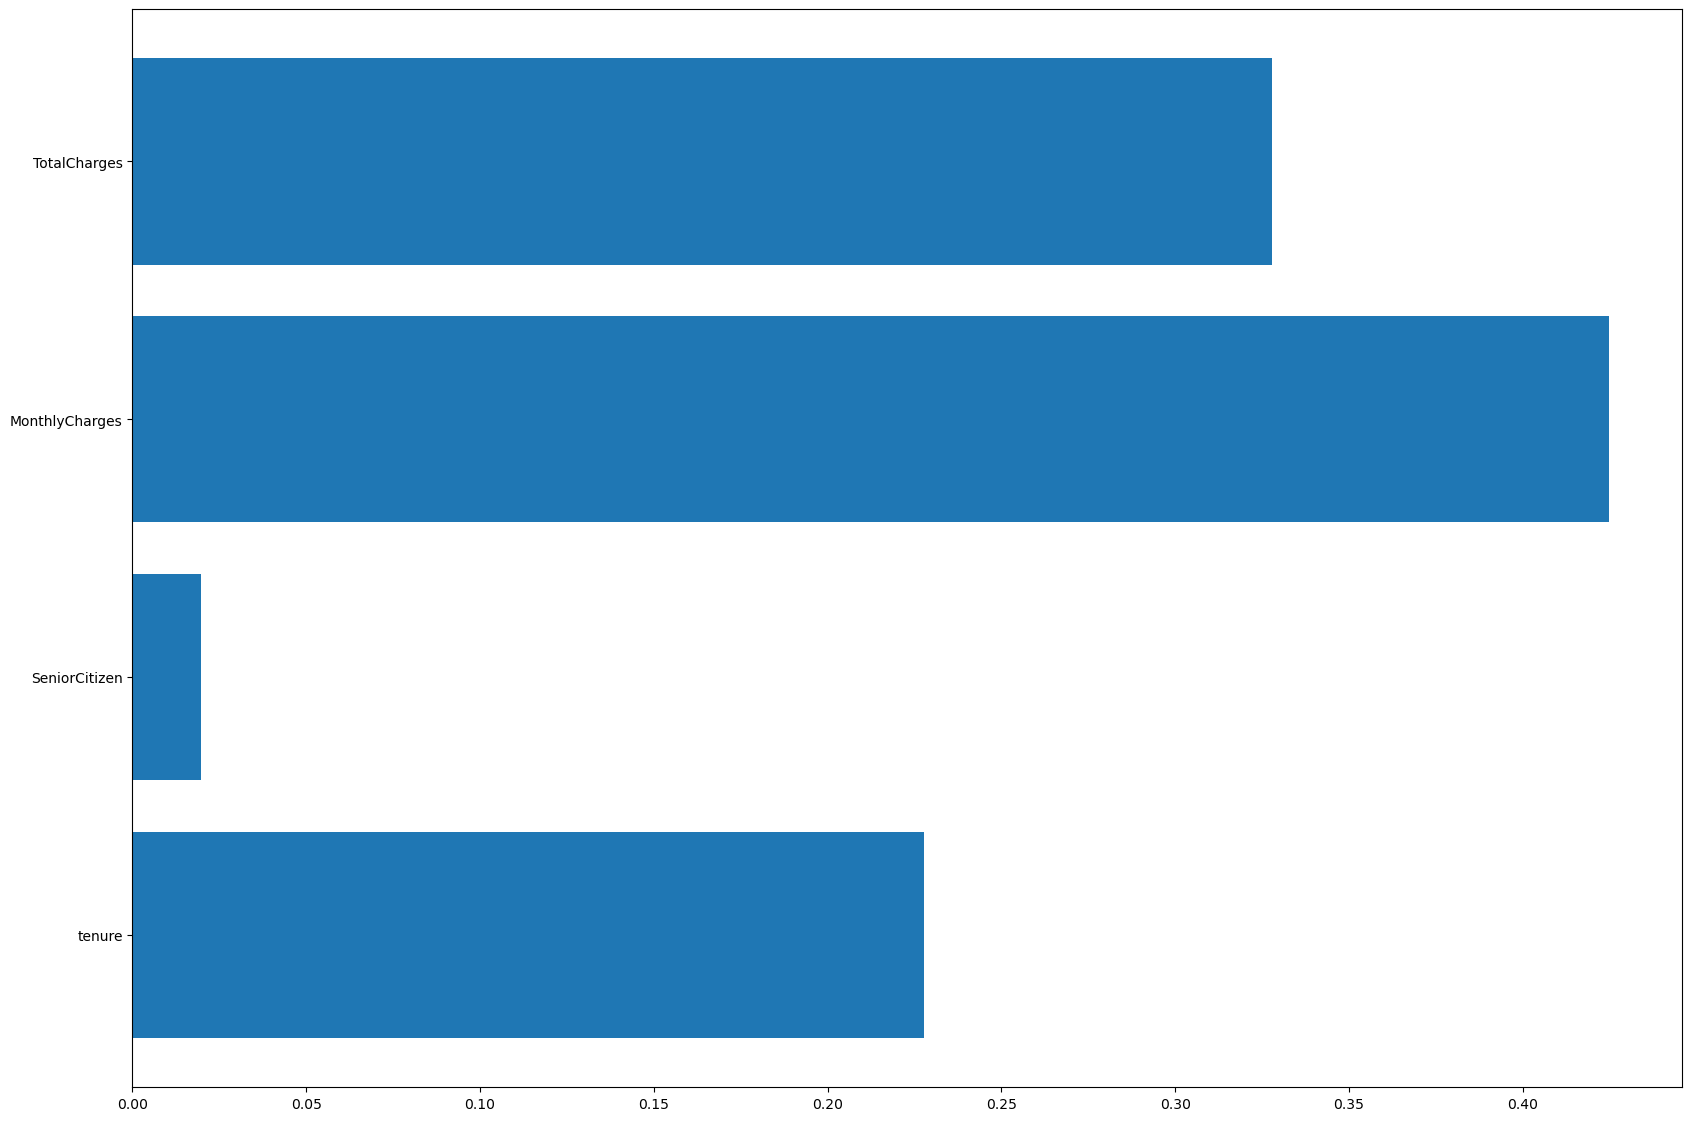

In [77]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)

In [80]:
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X, y, test_size=0.30, random_state=11)


model = DecisionTreeClassifier(max_depth=3)

model.fit(X_3_train, y_3_train)

y_pred_train_dt = model.predict(X_3_train)
y_pred_test_dt = model.predict(X_3_test)



performance_3_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_3_train, y_pred_train_dt),
                                         precision_score(y_3_train, y_pred_train_dt),
                                         recall_score(y_3_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_3_test, y_pred_test_dt),
                                        precision_score(y_3_test, y_pred_test_dt),
                                        recall_score(y_3_test, y_pred_test_dt)]})

display(performance_3_df)

,Error_metric,Train,Test
0,Accuracy,0.787018,0.778514
1,Precision,0.647904,0.662500
2,Recall,0.417116,0.370629


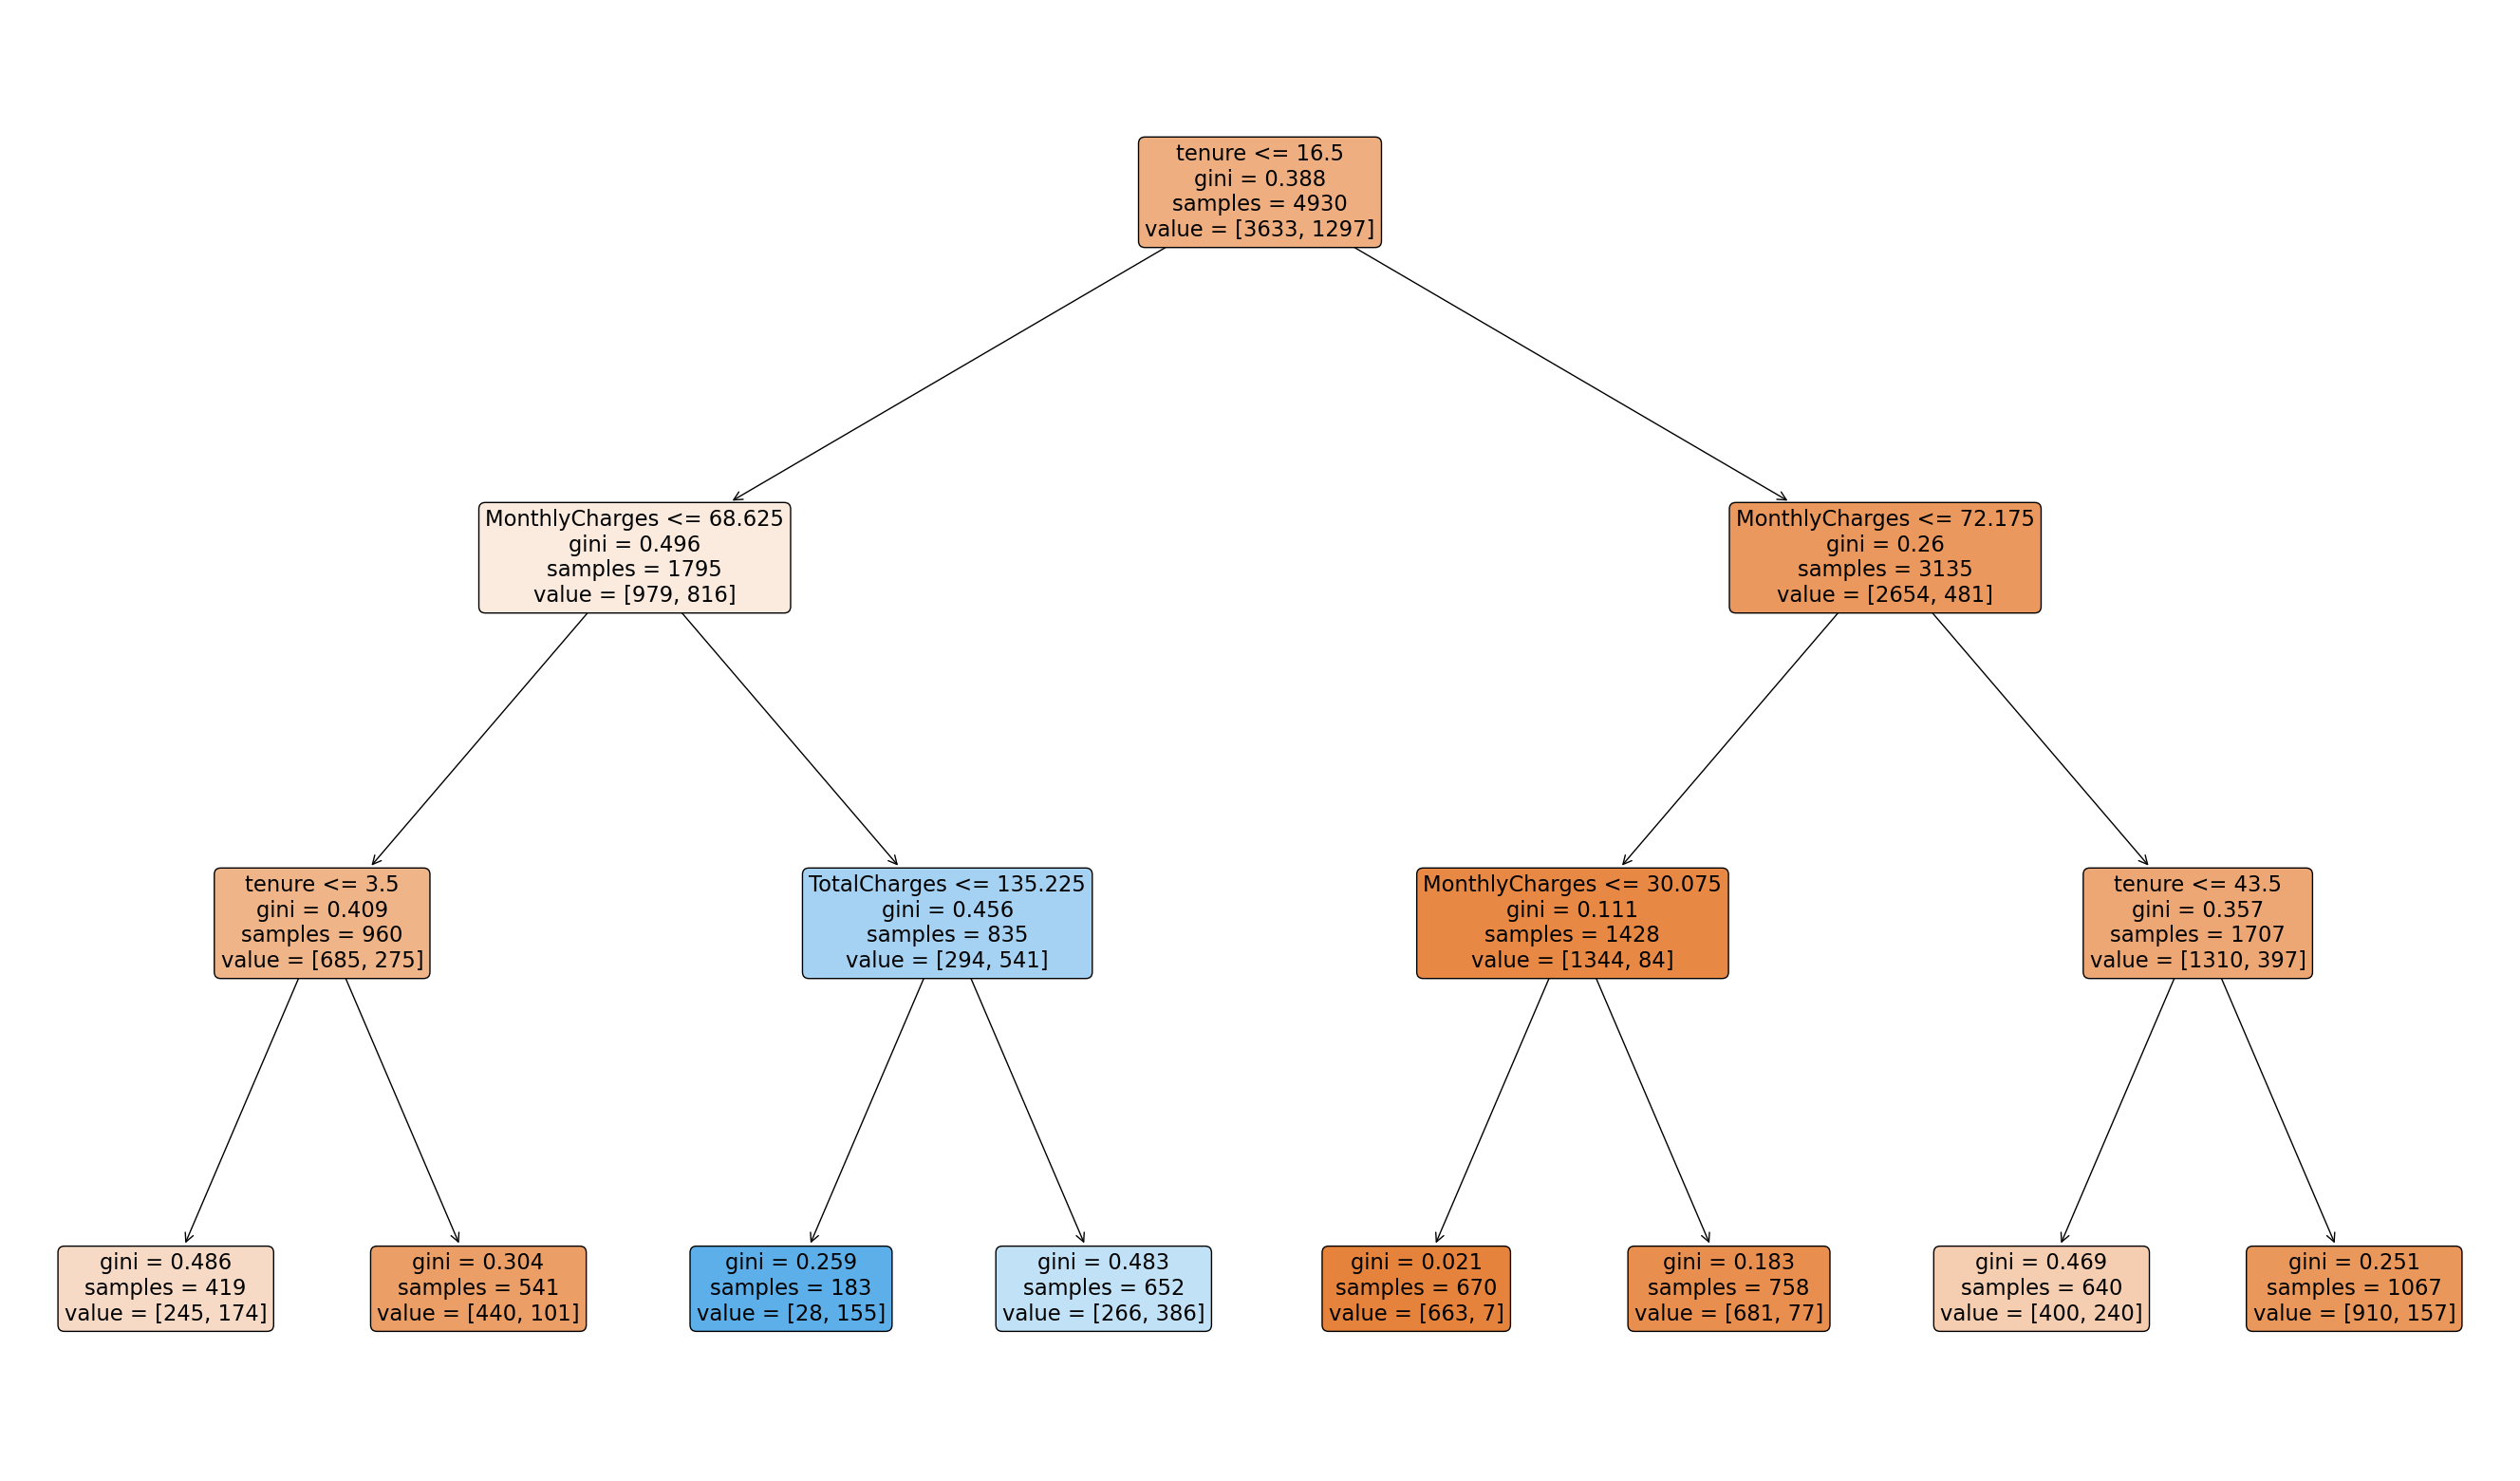

In [81]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [83]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [84]:
X_4_train, X_4_test, y_4_train, y_4_test = train_test_split(X, y, test_size=0.30, random_state=11)

In [85]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [86]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [108]:

print("X has %d rows and %d columns"  %(X.shape[0],X.shape[1]))
print("y has %d rows"  %(y.shape[0]))

model = DecisionTreeClassifier(max_depth=10)
model.fit(X_4_train, y_4_train)

print("X_train has %d rows and %d columns"  %(X_4_train.shape[0],X_4_train.shape[1]))
print("-----------------------------------")
print("The coefficient of determination for the test data is R2=%.2f"
      %(model.score(X_4_test, y_4_test)))
print("The coefficient of determination for the train data is R2=%.2f"
      %(model.score(X_4_train, y_4_train)))


X has 7043 rows and 4 columns
y has 7043 rows
X_train has 4930 rows and 4 columns
-----------------------------------
The coefficient of determination for the test data is R2=0.75
The coefficient of determination for the train data is R2=0.86


In [93]:
set(y)

{0, 1}

In [112]:
scores=cross_val_score(model, X_4_train, y_4_train, scoring='recall', cv=5) # 5 cv foldings
scores

array([0.44401544, 0.40540541, 0.45559846, 0.41538462, 0.42307692])

In [97]:
print("Five-fold cv results: \n %0.2f mean accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Five-fold cv results: 
 0.04 mean accuracy with a standard deviation of 0.03


In [98]:
y_4_test

6625    1
5975    1
6891    0
1681    0
4780    0
       ..
6143    0
4257    0
4590    0
842     1
1864    0
Name: Churn, Length: 2113, dtype: int64

In [100]:
y_4_pred = cross_val_predict(model, X_4_train, y_4_train, cv=5)
y_4_pred

array([0.07142857, 0.        , 0.13333333, ..., 0.28985507, 0.33333333,
       0.        ])

In [110]:
model1 = DecisionTreeClassifier(max_depth = 11)
model2 = LogisticRegression()
model3 = KNeighborsClassifier(n_neighbors=5)

model_pipeline = [model1, model2, model3]
model_names = ['Classification Tree', 'Logistic Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_sm, y_sm, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Classification Tree': 0.7428522729130038, 'Logistic Regression': 0.7307710555870768, 'KNN': 0.770488532115447}


In [111]:
print("Comparing the 3 regression scores we find \n")

pd.DataFrame([scores], index=["score"])

Comparing the 3 regression scores we find 



,Classification Tree,Logistic Regression,KNN
score,0.742852,0.730771,0.770489
